In [ ]:

#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## 9 REGRESSION DAY3 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs



In [36]:
#=================================================-
#### Slide 2: Import packages  ####

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf



In [37]:
main_dir = '/Users/datasociety/Desktop/af-werx'
data_dir = main_dir + "/data"


In [38]:
#=================================================-
#### Slide 4: Working directory  ####

# Set working directory.
os.chdir(data_dir)
# Check working directory.
print(os.getcwd())



/Users/datasociety/Desktop/af-werx/data


In [39]:
#=================================================-
#### Slide 21: Importing, EDA, and data cleaning  ####

IAI = pd.read_csv(data_dir + '/IAI.csv')
print(IAI.shape)
print(IAI.head(3))
print(IAI.isnull().values.any())



(27, 2)
     Price  Seats
0  2216.93     28
1  2240.27     24
2  2251.58     22
False


In [40]:
#=================================================-
#### Slide 22: Transforming predictor and target to log  ####

IAI['Price_log'] = np.log(IAI['Price'])
IAI['Seats_log'] = np.log(IAI['Seats'])
IAI.head(3)



,Price,Seats,Price_log,Seats_log
0,2216.93,28,7.703879,3.332205
1,2240.27,24,7.714352,3.178054
2,2251.58,22,7.719387,3.091042


In [41]:
#=================================================-
#### Slide 23: Fitting the log-log model  ####

IAI = sm.add_constant(IAI)
model_log = sm.OLS(IAI['Seats_log'], IAI.loc[:,['const','Price_log']]).fit()



In [42]:
#=================================================-
#### Slide 24: Predicting with the log-log model  ####

prediction_log = model_log.predict(IAI.loc[:,['const','Price_log']])

prediction_log[1:10]



1    3.177108
2    3.091878
3    2.864078
4    2.745240
5    2.546320
6    2.511855
7    2.472315
8    2.183191
9    2.031986
dtype: float64

In [43]:
#=================================================-
#### Slide 25: Exponentiating the predictions  ####

prediction = np.exp(prediction_log)
prediction[1:5]



1    23.977317
2    22.018390
3    17.532874
4    15.568353
dtype: float64

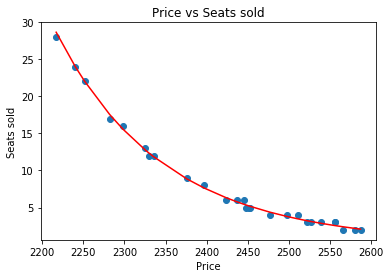

In [44]:
#=================================================-
#### Slide 26: Evaluating the log-log model: chart  ####

plt.scatter(IAI['Price'],
            IAI['Seats'])
plt.plot(IAI['Price'],
         prediction, 
         'red')
plt.title("Price vs Seats sold")
plt.xlabel("Price")
plt.ylabel("Seats sold")
plt.show()



In [45]:
#=================================================-
#### Slide 27: Evaluating the log-log model: RMSE  ####

actual = IAI['Seats']
prediction = prediction
residuals = actual - prediction
loglog_results =  pd.concat([actual.rename('actual'),
prediction.rename('predicted'),
residuals.rename('residuals')], axis = 1)

def rmse(predictions,actual):
    return np.sqrt(((prediction-actual) ** 2).mean())

print(rmse(loglog_results['predicted'],loglog_results['actual']))



0.33339266048990407


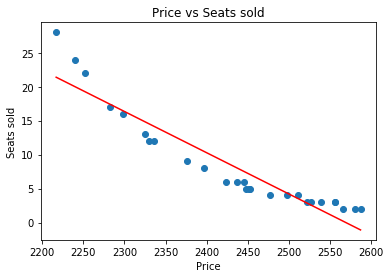

In [46]:
#=================================================-
#### Slide 28: How would a linear model have performed?  ####

# Fit the model
model_lin = sm.OLS(IAI['Seats'], IAI.loc[:,['const','Price']]).fit()
prediction = model_lin.predict(IAI.loc[:,['const','Price']])

plt.scatter(IAI['Price'],
            IAI['Seats'])
plt.plot(IAI['Price'],
         prediction,
         'red')
plt.title("Price vs Seats sold")
plt.xlabel("Price")
plt.ylabel("Seats sold")
plt.show()



In [47]:
#=================================================-
#### Slide 30: Exercise 1  ####





In [53]:
#=================================================-
#### Slide 35: Importing, EDA, and data cleaning  ####

GSPC = pd.read_csv('GSPC_data.csv')
GSPC.shape
GSPC.head(3)
GSPC.isnull().values.any()



False

In [54]:
#=================================================-
#### Slide 36: Transforming target to log  ####

GSPC['GSPC_log'] = np.log(GSPC['GSPC'])
GSPC.head(3)



,Dt,GSPC,GSPC_log
0,1,16.66,2.813011
1,2,16.85,2.824351
2,3,16.93,2.829087


In [56]:
#=================================================-
#### Slide 37: Fitting the log-lin model  ####

GSPC = sm.add_constant(GSPC)
model_lin = sm.OLS(GSPC['GSPC_log'], GSPC.loc[:,['const','Dt']]).fit()



In [57]:
#=================================================-
#### Slide 38: Predicting with the log-lin model  ####

prediction_lin = model_lin.predict(GSPC.loc[:,['const','Dt']])
prediction_lin[1:10]



1    3.103890
2    3.104164
3    3.104438
4    3.104712
5    3.104986
6    3.105260
7    3.105534
8    3.105808
9    3.106083
dtype: float64

In [58]:
#=================================================-
#### Slide 39: Exponentiating the predictions  ####

prediction = np.exp(prediction_lin)
prediction[1:5]



1    22.284469
2    22.290578
3    22.296688
4    22.302800
dtype: float64

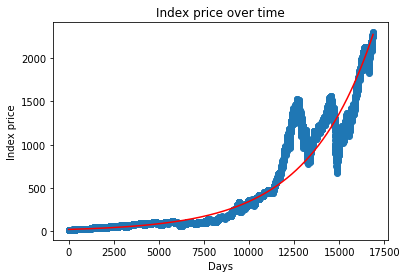

In [59]:
#=================================================-
#### Slide 40: Evaluating the log-lin model: chart  ####

plt.scatter(GSPC['Dt'],
            GSPC['GSPC'])
plt.plot(GSPC['Dt'], 
         prediction, 
         'red')
plt.title("Index price over time")
plt.xlabel("Days")
plt.ylabel("Index price")
plt.show()



In [60]:
#=================================================-
#### Slide 41: Evaluating the log-lin model: RMSE  ####

actual = GSPC['GSPC']
prediction = prediction
residuals = actual - prediction
loglin_results =  pd.concat([actual.rename('actual'),
prediction.rename('predicted'),
residuals.rename('residuals')], axis = 1)
def rmse(predictions,actual):
    return np.sqrt(((prediction-actual) ** 2).mean())

print(rmse(loglin_results['predicted'],loglin_results['actual']))



183.39211235044104


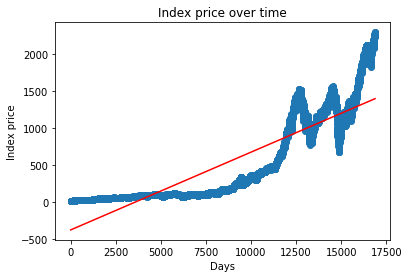

In [61]:
#=================================================-
#### Slide 42: How would a linear model have performed?  ####

# Fit the model
model_lin = sm.OLS(GSPC['GSPC'], GSPC.loc[:,['const','Dt']]).fit()
prediction = model_lin.predict(GSPC.loc[:,['const','Dt']])
plt.scatter(GSPC['Dt'],GSPC['GSPC'])
plt.plot(GSPC['Dt'], prediction, 'red')
plt.title("Index price over time")
plt.xlabel("Days")
plt.ylabel("Index price")
plt.show()



In [ ]:
#=================================================-
#### Slide 44: Exercise 2  ####





In [62]:
#=================================================-
#### Slide 50: Importing, EDA, and data cleaning  ####

poly3 = pd.read_csv('poly3.csv')
print(poly3.shape)
print(poly3.head(3))
print(poly3.isnull().values.any())



(202, 2)
     X         Y
0  0.0  1.301945
1  0.0  0.698055
2  0.1  2.552809
False


In [63]:
#=================================================-
#### Slide 51: Adding X^2 and X^3 to our dataset  ####

poly3['X2'] = np.power(poly3['X'], 2)
poly3['X3'] = np.power(poly3['X'], 3)
poly3.head(3)



,X,Y,X2,X3
0,0.0,1.301945,0.00,0.000
1,0.0,0.698055,0.00,0.000
2,0.1,2.552809,0.01,0.001


In [64]:
#=================================================-
#### Slide 52: Fitting the polynomial model  ####

poly3 = sm.add_constant(poly3)
model_poly = sm.OLS(poly3['Y'], poly3.loc[:,['const','X','X2','X3']]).fit()



In [65]:
#=================================================-
#### Slide 53: Predicting with the polynomial model  ####

prediction_poly = model_poly.predict(poly3.loc[:,['const','X', 'X2', 'X3']])
prediction_poly[0:10]



0    1.000000
1    1.000000
2    1.965333
3    1.965333
4    2.862667
5    2.862667
6    3.694000
7    3.694000
8    4.461333
9    4.461333
dtype: float64

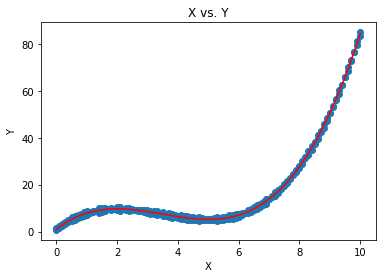

In [66]:
#=================================================-
#### Slide 54: Evaluating the polynomial model: chart  ####

plt.scatter(poly3['X'],
            poly3['Y'])
plt.plot(poly3['X'], 
         prediction_poly, 'red')
plt.title("X vs. Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()



In [67]:
#=================================================-
#### Slide 55: Evaluating the polynomial model: RMSE  ####

actual = poly3['Y']
prediction = prediction_poly
residuals = actual - prediction
poly_results =  pd.concat([actual.rename('actual'),
                           prediction.rename('predicted'),
                           residuals.rename('residuals')],
                           axis = 1)

def rmse(predictions,actual):
    return np.sqrt(((prediction-actual) ** 2).mean())

print(rmse(poly_results['predicted'],poly_results['actual']))



0.5837434014764878


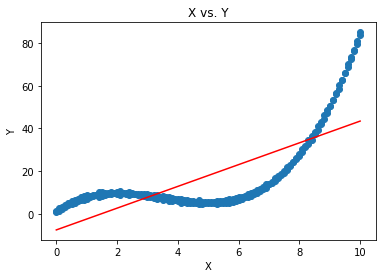

In [68]:
#=================================================-
#### Slide 56: How would a linear model have performed?  ####

# Fit the model
model_lin = sm.OLS(poly3['Y'], poly3.loc[:,['const','X']]).fit()
prediction = model_lin.predict(poly3.loc[:,['const','X']])

plt.scatter(poly3['X'],
            poly3['Y'])
plt.plot(poly3['X'], 
         prediction, 'red')
plt.title("X vs. Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()



In [ ]:
#=================================================-
#### Slide 58: Exercise 3  ####





In [69]:
#=================================================-
#### Slide 67: Importing, EDA, and data cleaning  ####

grocery = pd.read_csv('grocery.csv')
print(grocery.shape)
print(grocery.head(3))
print(grocery.isnull().values.any())



(31, 3)
     sales      news     radio
0  1600.00  1.000000  1.500000
1  1640.25  1.033333  1.523333
2  1681.00  1.066667  1.546667
False


In [70]:
#=================================================-
#### Slide 68: Adding the interaction to our dataset  ####

grocery['news:radio'] = grocery['news'] * grocery['radio']
grocery.head(3)



,sales,news,radio,news:radio
0,1600.00,1.000000,1.500000,1.500000
1,1640.25,1.033333,1.523333,1.574111
2,1681.00,1.066667,1.546667,1.649778


In [71]:
#=================================================-
#### Slide 69: Fitting the model  ####

grocery = sm.add_constant(grocery)
model_interact = sm.OLS(grocery['sales'], grocery.loc[:,['const','news','radio','news:radio']]).fit()



In [72]:
#=================================================-
#### Slide 70: Predicting with the model  ####

prediction_interact = model_interact.predict(grocery.loc[:,['const','news', 'radio', 'news:radio']])
prediction_interact[1:10]



1    1640.25
2    1681.00
3    1722.25
4    1764.00
5    1806.25
6    1849.00
7    1892.25
8    1936.00
9    1980.25
dtype: float64

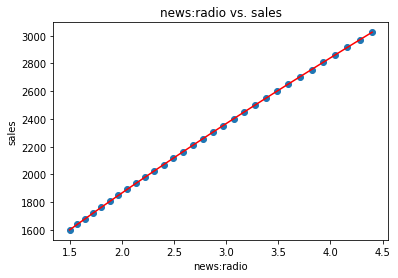

In [76]:
plt.scatter(grocery['news:radio'],
            grocery['sales'])
plt.plot(grocery['news:radio'], 
         prediction_interact, 'red')
plt.title("news:radio vs. sales")
plt.xlabel("news:radio")
plt.ylabel("sales")
plt.show()

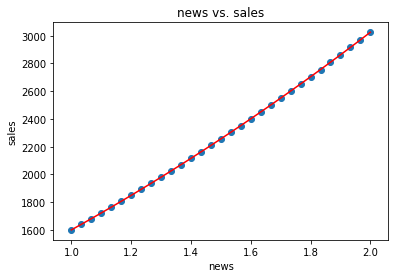

In [80]:
plt.scatter(grocery['news'],
            grocery['sales'])
plt.plot(grocery['news'], 
         prediction_interact, 'red')
plt.title("news vs. sales")
plt.xlabel("news")
plt.ylabel("sales")
plt.show()

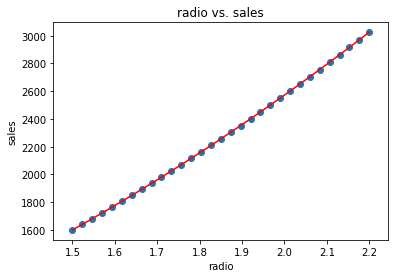

In [83]:
plt.scatter(grocery['radio'],
            grocery['sales'])
plt.plot(grocery['radio'], 
         prediction_interact, 'red')
plt.title('radio vs. sales')
plt.xlabel("radio")
plt.ylabel("sales")
plt.show()

In [73]:
#=================================================-
#### Slide 71: Evaluating the model: RMSE  ####

actual = grocery['sales']
prediction = prediction_interact
residuals = actual - prediction
interact_results =  pd.concat([actual.rename('actual'),
                               prediction.rename('predicted'),
                               residuals.rename('residuals')], axis = 1)
def rmse(predictions,actual):
    return np.sqrt(((prediction-actual) ** 2).mean())

print(rmse(interact_results['predicted'],interact_results['actual']))



5.5960811357290745e-12


In [74]:
#=================================================-
#### Slide 72: What if we left out the interaction?  ####

model_lin = sm.OLS(grocery['sales'], grocery.loc[:,['const','news','radio']]).fit()
prediction_lin = model_lin.predict(grocery.loc[:,['const','news','radio']])
actual = grocery['sales']
prediction = prediction_lin
residuals = actual - prediction
lin_results =  pd.concat([actual.rename('actual'),
                          prediction.rename('predicted'),
                          residuals.rename('residuals')], axis = 1)

def rmse(predictions,actual):
    return np.sqrt(((prediction-actual) ** 2).mean())

print(round(rmse(lin_results['predicted'],lin_results['actual'])))



18.0
